In [1]:
#Hastaya hangi ilacın verilmesi gerektiğini tahmin eden bir decision tree modeli oluşturacağız.
#Kütüphanelerimizi import edelim.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Verimizi dataframe olarak alalım.
df = pd.read_csv('drug200.csv')

In [4]:
#Verimizi inceleyelim.
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
#Eksik veri var mı diye kontrol edelim
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [11]:
#Şimdi verilerimizi model için hazırlayalım.
X = df.drop('Drug',axis=1)
y = df['Drug']

In [32]:
#Train test split yapalım.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [33]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,M,NORMAL,NORMAL,15.790
189,64,M,HIGH,NORMAL,20.932
90,62,M,NORMAL,HIGH,16.594
136,55,F,HIGH,HIGH,10.977
51,67,M,NORMAL,NORMAL,10.898


In [34]:
#Veri setimizdeki kategorik verileri işlem yapabileceğimiz verilere çevirelim.
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [35]:
#Modelimizi eğitip, test seti üzerinde tahmin yaptırıp modeli değerlendirelim.
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        29

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [40]:
confusion_matrix(y_test,pred)

array([[ 8,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 29]], dtype=int64)

[Text(0.5, 0.9, 'X[4] <= 14.829\ngini = 0.692\nsamples = 134\nvalue = [15, 12, 10, 35, 62]'),
 Text(0.375, 0.7, 'X[2] <= 1.5\ngini = 0.673\nsamples = 72\nvalue = [15, 12, 10, 35, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 0, 24, 0]'),
 Text(0.5, 0.5, 'X[2] <= 2.5\ngini = 0.744\nsamples = 48\nvalue = [15, 12, 10, 11, 0]'),
 Text(0.25, 0.3, 'X[0] <= 50.5\ngini = 0.494\nsamples = 27\nvalue = [15, 12, 0, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0, 0, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(0.75, 0.3, 'X[3] <= 1.5\ngini = 0.499\nsamples = 21\nvalue = [0, 0, 10, 11, 0]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]'),
 Text(0.625, 0.7, 'gini = 0.0\nsamples = 62\nvalue = [0, 0, 0, 0, 62]')]

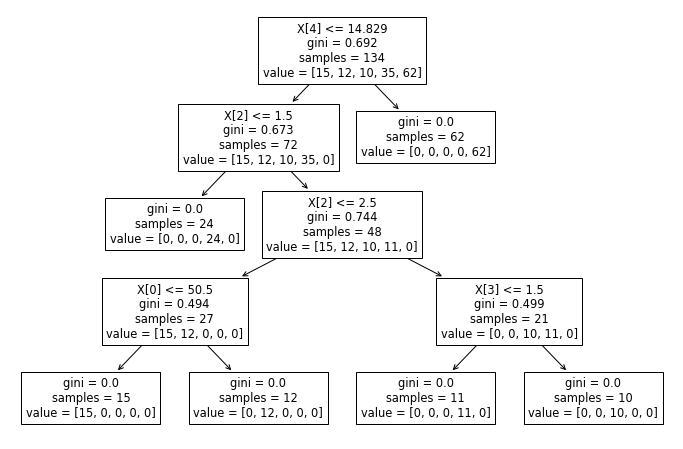

In [41]:
#Şimdi oluşan decision tree'yi görselleştirelim ve inceleyelim.
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dtree.fit(X_train, y_train)) 